# Neural Network for Regression: University Admission Prediction

This notebook demonstrates how to build and train a neural network for regression tasks. We'll predict university admission chances using student features like GRE score, TOEFL score, GPA, etc.

## Key Concepts:

- **Regression vs Classification**: We predict a continuous value (admission chance: 0–1) instead of discrete classes.
- **Loss Function**: Use Mean Squared Error (MSE) instead of categorical crossentropy.
- **Output Activation**: Linear activation (no squashing) for regression outputs.

## Import Required Libraries

Start by importing NumPy for numerical operations and Pandas for data handling.


In [8]:
import numpy as np
import pandas as pd

## Load the Dataset

Load the admission prediction CSV file containing student records and their admission chances.


In [37]:
df = pd.read_csv("./Admission_Predict_Ver1.1.csv")

## Check Dataset Dimensions

View the shape of the dataset: (number of samples, number of features).


In [38]:
df.shape

(500, 9)

## Preview First Few Rows

Examine the first few records to understand the data structure and feature values.


In [39]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Inspect Data Info

Check data types, null values, and memory usage.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Check for Duplicate Rows

Verify if there are any duplicate records that should be removed.


In [41]:
df.duplicated().sum()

0

## Data Cleaning: Remove Non-Predictive Columns

Drop the "Serial No." column as it's just an index and has no predictive value.


In [42]:
df.drop(columns=["Serial No."], inplace=True)

## Separate Features and Target

Split the dataset into features (X) and target (y):

- X: All columns except the last one (student features: GRE, TOEFL, GPA, etc.)
- y: Last column (admission chance to predict)


In [43]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

## Display Feature Matrix

View the feature matrix X.


In [44]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


## Display Target Vector

View the target vector y (admission chances).


In [45]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

## Import Train-Test Split

Import the function to divide data into training and testing subsets.


In [46]:
from sklearn.model_selection import train_test_split

## Split Data into Training and Testing Sets

Divide the data:

- 80% for training the model
- 20% for evaluating model performance on unseen data
- `random_state=1` ensures reproducible splits


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Import Feature Scaler

Import MinMaxScaler to normalize features to a fixed range [0, 1].


In [48]:
from sklearn.preprocessing import MinMaxScaler

## Normalize Features Using MinMaxScaler

Scale training and test features to [0, 1]:

- `fit_transform` on training data learns the scale parameters
- `fit_transform` on test data applies the same transformation
- Scaling helps neural networks train faster and more stably


In [49]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Import TensorFlow and Keras Components

Import the necessary deep learning libraries:

- Sequential: Linear stack of layers
- Dense: Fully connected layer
- Input: Specifies input shape


In [50]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

## Build Neural Network for Regression

Create a simple feedforward network:

- Input shape matches the number of features
- Hidden layer 1: 7 neurons with ReLU (non-linearity)
- Hidden layer 2: 7 neurons with ReLU
- Output layer: 1 neuron with **linear activation** (critical for regression—no squashing)

The linear activation allows output to be any real number, not bounded to [0, 1].


In [51]:
model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear"))

## Display Model Summary

Print the model architecture showing layer types, output shapes, and parameter counts.


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

Configure the model for training:

- Loss: `mean_squared_error` (MSE)—appropriate for regression tasks
  - Measures average squared difference between predicted and actual values
- Optimizer: `Adam`—adaptive learning rate optimizer
- No metrics specified here; we'll use R² for evaluation later


In [53]:
model.compile(loss="mean_squared_error", optimizer="Adam")

## Train the Model

Train the network on scaled training data:

- `epochs=100`: Number of complete passes through the training data
- `validation_split=0.2`: Reserve 20% of training data for validation monitoring
- The `history` object records loss values for both training and validation sets


In [54]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3624 - val_loss: 0.3196
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2572 - val_loss: 0.2279
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1805 - val_loss: 0.1490
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1181 - val_loss: 0.0895
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0704 - val_loss: 0.0522
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - val_loss: 0.0339
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - val_loss: 0.0270
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - val_loss: 0.0249
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - val_loss: 0.0236
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0248 - val_loss: 0.0228
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0249 - val_loss: 0.0222
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

## Make Predictions on Test Set

Use the trained model to predict admission chances for test samples.


In [55]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


## Import Regression Metrics

Import R² score (coefficient of determination) to evaluate model performance:

- R² measures the proportion of variance explained by the model
- Range: 0 to 1 (higher is better)
- 1.0 = perfect predictions, 0.0 = model explains no variance


In [56]:
from sklearn.metrics import r2_score

## Evaluate Model: Calculate R² Score

Compute the R² score on test data to assess how well the model generalizes to unseen data.


In [57]:
r2_score(y_test, y_pred)

0.7540105824863965

## Import Visualization Library

Import Matplotlib for plotting training curves.


In [58]:
import matplotlib.pyplot as plt

## Plot Training and Validation Loss

Visualize learning curves:

- **Blue line (training loss)**: Loss on data the model trained on
- **Orange line (validation loss)**: Loss on held-out validation data
- Declining curves indicate successful learning
- If validation loss increases while training loss decreases, the model is overfitting


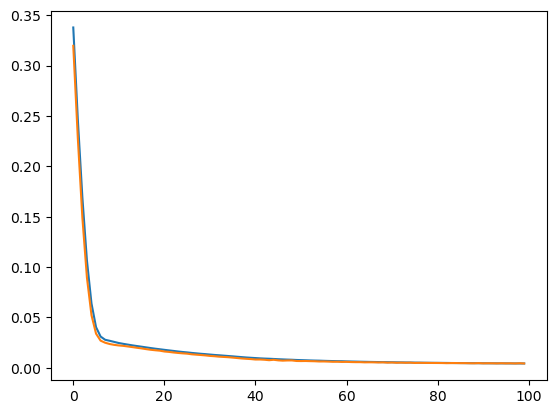

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()